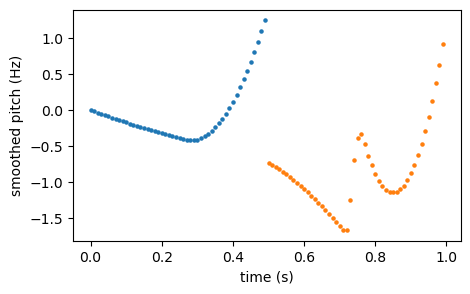

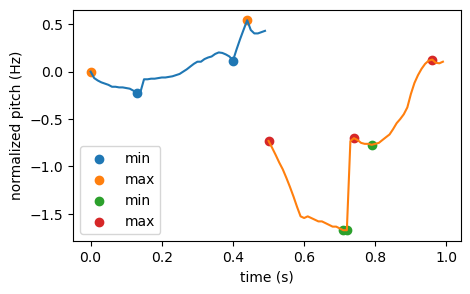

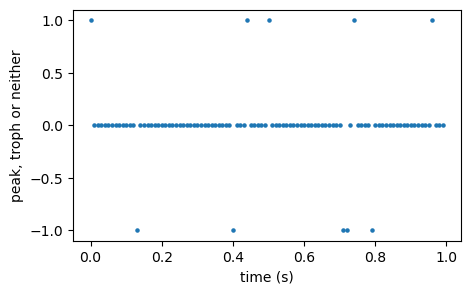

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import argrelextrema
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import os
from misc import *

def determine_peaks(data,precision):
    halfway = int(len(data)/2)
    indexMax = argrelextrema(data[:halfway],np.greater_equal,order=precision)[0]
    indexMin = argrelextrema(data[:halfway],np.less_equal,order=precision)[0]
    indexMax2 = argrelextrema(data[halfway:len(data)],np.greater_equal,order=precision)[0]+halfway
    indexMin2 = argrelextrema(data[halfway:len(data)],np.less_equal,order=precision)[0]+halfway
    return indexMax,indexMin,indexMax2,indexMin2

def test_single_plot(time,data,precision):
    halfway = int(len(data)/2)
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    
    fig,frame = plt.subplots(1,1,figsize=(5,3))
    psize = 2
    # frame.scatter(time,sound,s=psize)
    frame.plot(time[:halfway],data[:halfway])
    frame.plot(time[halfway:len(data)],data[halfway:len(data)])
    
    frame.scatter(time[indexMin],data[indexMin],label="min")
    frame.scatter(time[indexMax],data[indexMax],label="max")
    frame.scatter(time[indexMin2],data[indexMin2],label="min")
    frame.scatter(time[indexMax2],data[indexMax2],label="max")
    
    frame.set_xlabel("time (s)")
    frame.set_ylabel("normalized pitch (Hz)")
    
    frame.legend()
    plt.show()
    
def reduction_trophs(data,precision):
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    reduced = np.zeros(len(data))
    reduced[indexMax] += 1
    reduced[indexMin] -= 1
    reduced[indexMax2] += 1
    reduced[indexMin2] -= 1
    
    fig,frame = plt.subplots(1,1,figsize=(5,3))
    psize = 5
    time = np.arange(len(reduced))/len(reduced)
    frame.scatter(time,reduced,s=psize)
    
    frame.set_xlabel("time (s)")
    frame.set_ylabel("peak, troph or neither")
    plt.show()
    
def smooth_peaks(data,precision):
    halfway = int(len(data)/2)
    indexMax,indexMin,indexMax2,indexMin2 = determine_peaks(data,precision)
    
    indexMax = indexMax.tolist()
    indexMin = indexMin.tolist()
    indexMax2 = indexMax2.tolist()
    indexMin2 = indexMin2.tolist()
    
    peaks = sorted(indexMax + indexMin)
    peaks2 = sorted(indexMin2+indexMax2)
    
    time = np.arange(len(data))/len(data)
    kind = "quadratic"
    cs = interp1d(time[peaks],data[peaks],bounds_error=False,fill_value="extrapolate",kind=kind)
    cs2 = interp1d(time[peaks2],data[peaks2],bounds_error=False,fill_value="extrapolate",kind=kind)
    
    fig =plt.figure(figsize=(5,3))
    frame = fig.add_subplot(1,1,1)
    psize = 5
    frame.scatter(time[:halfway],cs(time[:halfway]),s=psize)
    frame.scatter(time[halfway:len(data)],cs2(time[halfway:len(data)]),s=psize)
    frame.set_xlabel("time (s)")
    frame.set_ylabel("smoothed pitch (Hz)")
    plt.show()
    

    
fileName = "data/pitch_data_questions_processed_pitch.txt"
pitch = read_file2(os.path.abspath(os.path.join(os.pardir, fileName)))
#plot_pitch_data(data)
N = 2
P = 5
time = np.arange(len(pitch[N]))/len(pitch[N])

smooth_peaks(pitch[N],P)
test_single_plot(time,pitch[N],P)
reduction_trophs(pitch[N],P)

In [6]:
import numpy as np
import os
from matplotlib import pyplot as plt

from abstracting_gradient import *
from determine_gradient import *
from misc import *
from sklearn.preprocessing import OrdinalEncoder


def compare_plot(allData,allBoundary,N,tp):
    halfway = int(len(allData[0])/2)
    time = np.arange(len(allData[0]))/len(allData[0])
    allData = allData[N]
    fig,frames = plt.subplots(len(allData),len(allBoundary),figsize=(7*len(allBoundary),4*len(allData)))
    
    parameters = {'xtick.labelsize': 14,'ytick.labelsize': 14}
    plt.rcParams.update(parameters)
    for row,data in enumerate(allData):
        for col,boundary in enumerate(allBoundary):
            smoothL = determine_smooth_gradient_change(data[:halfway],time[:halfway],boundary)
            smoothR = determine_smooth_gradient_change(data[halfway:len(data)],time[halfway:len(data)],boundary)
            frames[row][col].plot(time[:halfway],smoothL)
            frames[row][col].plot(time[halfway:len(data)],smoothR)
                
            frames[row][col].plot(time[:halfway],data[:halfway])
            frames[row][col].plot(time[halfway:len(data)],data[halfway:len(data)])
            
            fsize=16
            frames[row][col].set_xlabel("time (s)",fontsize=fsize)
            frames[row][col].set_ylabel("log2 pitch (Hz) "+str(N[row]),fontsize=fsize)
            frames[row][col].set_title(str(boundary)+tp,fontsize=fsize+3)
            
    fig.tight_layout()

    fileName = "save_progress_plots/testing%s.jpg"
    plt.savefig(next_path(os.path.abspath(os.path.join(os.pardir, fileName))))

    plt.show()
    return

fileName = "data/pitch_data_questions_processed_pitch.txt"
pitch = read_file2(os.path.abspath(os.path.join(os.pardir, fileName)))

N = np.arange(0,20)
B = [2.1,2.3,2.5,2.7,2.9]

# compare_plot(pitch,B,N," q" if fileName=="data/pitch_data_questions_processed_pitch.txt" else " s")

# N = 10
# print_abstract(pitch[N],B)


OrdinalEncoder()
